### Required Imports

In [1]:
import numpy as np
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn  import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

### Reading the DataFrame

In [2]:
df = pd.read_csv('kc_final.csv')
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Dropping Unwanted Columns

In [3]:
df = df.drop(['id'], axis=1)
df

,Unnamed: 0,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df = df.iloc[:,1:]
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
df.to_csv('kc_cleaned.csv', index=False)

### Info of the DataFrame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

### Checking the DataFrame for NotNull Values

In [7]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Counting Dupliacates for Particular Column

In [8]:
df.pivot_table(columns=['waterfront'], aggfunc='size')

waterfront
0    21450
1      163
dtype: int64

### Label Encoding of DataFrame

In [9]:
le = LabelEncoder()
df['date'] = le.fit_transform(df['date'])
df['zipcode'] = le.fit_transform(df['zipcode'])
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,164,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,66,47.5112,-122.257,1340,5650
1,220,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,55,47.7210,-122.319,1690,7639
2,290,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,16,47.7379,-122.233,2720,8062
3,220,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,58,47.5208,-122.393,1360,5000
4,283,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,37,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,19,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,42,47.6993,-122.346,1530,1509
21609,288,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,60,47.5107,-122.362,1830,7200
21610,52,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,59,47.5944,-122.299,1020,2007
21611,252,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,15,47.5345,-122.069,1410,1287


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  int32  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [11]:
df['date'] = df['date'].astype(np.int64)
df['price'] = df['price'].astype(np.int64)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,164,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,66,47.5112,-122.257,1340,5650
1,220,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,55,47.7210,-122.319,1690,7639
2,290,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,16,47.7379,-122.233,2720,8062
3,220,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,58,47.5208,-122.393,1360,5000
4,283,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,37,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,19,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,42,47.6993,-122.346,1530,1509
21609,288,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,60,47.5107,-122.362,1830,7200
21610,52,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,59,47.5944,-122.299,1020,2007
21611,252,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,15,47.5345,-122.069,1410,1287


### Creating X and Y

In [12]:
x = df.drop('price',axis= 1)
y = df['price']
print(x)
print(y)

       date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0       164         3       1.00         1180      5650     1.0           0   
1       220         3       2.25         2570      7242     2.0           0   
2       290         2       1.00          770     10000     1.0           0   
3       220         4       3.00         1960      5000     1.0           0   
4       283         3       2.00         1680      8080     1.0           0   
...     ...       ...        ...          ...       ...     ...         ...   
21608    19         3       2.50         1530      1131     3.0           0   
21609   288         4       2.50         2310      5813     2.0           0   
21610    52         2       0.75         1020      1350     2.0           0   
21611   252         3       2.50         1600      2388     2.0           0   
21612   166         2       0.75         1020      1076     2.0           0   

       view  condition  grade  sqft_above  sqft_bas

### Train and Test Data Split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
#random_state=101

In [14]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(15129, 19) (6484, 19) (15129,) (6484,)


### Multiple Linear Regression Model

In [15]:
model = LinearRegression()
lr = model.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [16]:
print(y_pred_lr)

[ 705741.36778278 1461157.42055665  576823.67651585 ...   95606.23442072
  524990.63807484  462138.6083042 ]


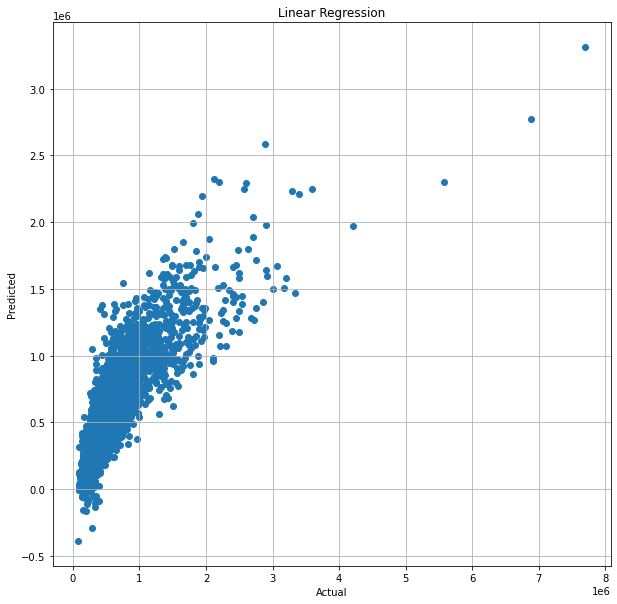

In [17]:
plt.figure(figsize = (10,10))
plt.title('Linear Regression')
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid()
plt.show()

### Evaluation Metrics for Linear Regression

In [18]:
print('MSE: ', mean_squared_error(y_test, y_pred_lr))
print('MAE: ', mean_absolute_error(y_test, y_pred_lr))
print('R2 Score : ', r2_score(y_test, y_pred_lr))
print('RMSE : ', math.sqrt(mean_squared_error(y_test, y_pred_lr)))

MSE:  42764508586.84156
MAE:  123895.22108486391
R2 Score :  0.693909346931562
RMSE :  206795.81375560182


### KNN Model

In [19]:
knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print(y_pred_knn)

[615671.19 724510.53 614521.02 ... 261853.73 324238.   464255.88]


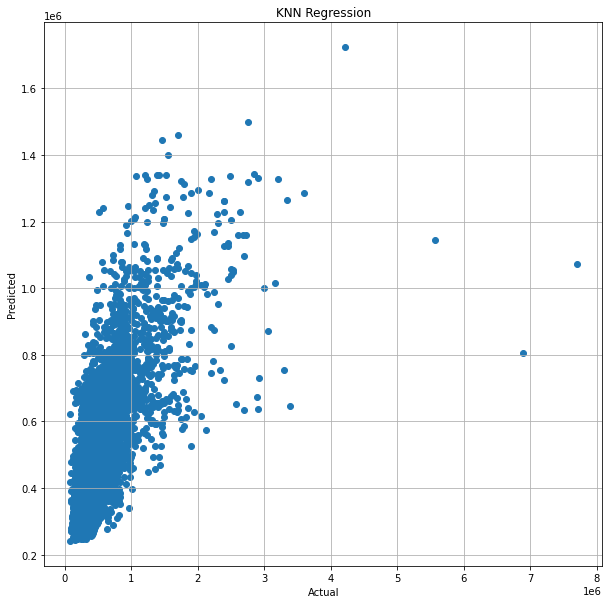

In [20]:
plt.figure(figsize = (10,10))
plt.title('KNN Regression')
plt.scatter(y_test, y_pred_knn)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid()
plt.show()

In [21]:
print('MSE: ', mean_squared_error(y_test, y_pred_knn))
print('MAE: ', mean_absolute_error(y_test, y_pred_knn))
print('R2 Score : ', r2_score(y_test, y_pred_knn))
print('RMSE : ', math.sqrt(mean_squared_error(y_test, y_pred_knn)))

MSE:  80781053827.63834
MAE:  161143.80488433066
R2 Score :  0.42180265040467135
RMSE :  284220.07991631824
